In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# FASHION MNIST

In [2]:
fm=tf.keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test)=fm
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

In [3]:
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

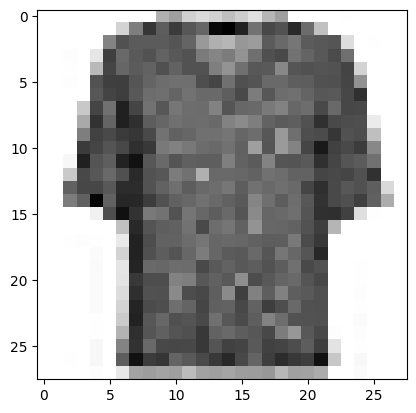

In [4]:
import matplotlib.pyplot as pl
pl.imshow(x_train[200],cmap='binary')
pl.show()

In [5]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_train.shape

(54000, 28, 28)

In [7]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
#Input Layer
model.add(tf.keras.layers.Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
#Hidden Layers
units=[100 for i in range(10)]
for i in range(10):
    model.add(tf.keras.layers.Dense(units[i],activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

C:\Users\sudip\PycharmProjects\pythonProject\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,410 (665.66 KB)

 Trainable params: 170,410 (665.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),callbacks=[early_stopping])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3080 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3510 - val_sparse_categorical_accuracy: 0.8747
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2991 - sparse_categorical_accuracy: 0.8909 - val_loss: 0.3506 - val_sparse_categorical_accuracy: 0.8723
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2908 - sparse_categorical_accuracy: 0.8947 - val_loss: 0.3514 - val_sparse_categorical_accuracy: 0.8750
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2828 - sparse_categorical_accuracy: 0.8973 - val_loss: 0.3414 - val_sparse_categorical_accuracy: 0.8783
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2751 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.3398 - val_sparse_categorical_accuracy: 0.8797
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2669 - sparse_categorical_accuracy: 0.9015 - val_loss: 0.3486 - val_sparse_categorical_accuracy:

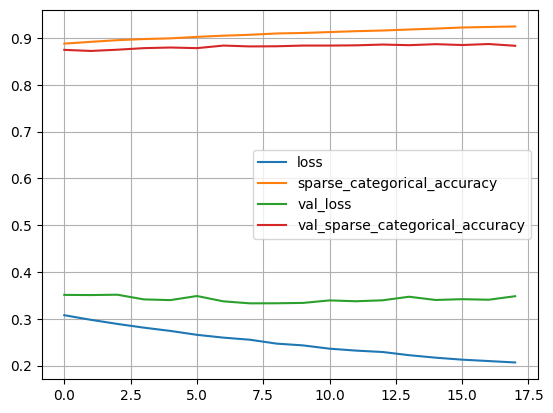

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)
pl.show()

In [17]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3846 - sparse_categorical_accuracy: 0.8673


[0.3869638442993164, 0.8658999800682068]

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(x_test)
y_pred=y_pred.argmax(axis=1)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[9 2 1 ... 8 1 5]
[[710   1   9  56   4   1 210   0   9   0]
 [  1 961   2  30   3   0   3   0   0   0]
 [  9   0 812  21  65   0  92   0   1   0]
 [ 13   7  10 899  37   1  31   0   2   0]
 [  0   1 138  24 756   0  79   0   2   0]
 [  1   0   0   1   0 953   0  27   5  13]
 [ 59   1  98  42  59   0 740   0   1   0]
 [  0   0   0   0   0  15   0 969   0  16]
 [  5   0   6   6   4  11  31   4 931   2]
 [  0   0   0   1   0   9   1  61   0 928]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.83      0.90      0.86      1000
           4       0.81      0.76      0.78      1000
           5       0.96      0.95      0.96      1000
           6       0.62      0.74      0.68      1000
           7       0.91      0.97      0.94      1000
           8       0.98

In [19]:
model.save('fashion_mnist_model.keras')

# CIFAR 10

In [37]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.backend import clear_session
clear_session()

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Display the shape of the dataset
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((45000, 32, 32, 3), (45000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [38]:

x_train = x_train_full[5000:]
y_train = y_train_full[5000:]
x_valid = x_train_full[:5000]
y_valid = y_train_full[:5000]

In [39]:
model_A=tf.keras.models.load_model('fashion_mnist_model.keras')

In [40]:
model_A_clone=tf.keras.models.clone_model(model_A)

In [41]:
model_A_clone.set_weights(model_A.get_weights())

In [42]:
model_B=tf.keras.Sequential(model_A_clone.layers[:-1])

In [43]:
model_B.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,400 (661.72 KB)

 Trainable params: 169,400 (661.72 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
model_B.add(tf.keras.layers.Dense(10,name='output_dense',activation='softmax'))

In [46]:
model_B.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_dense (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,400 (661.72 KB)

 Trainable params: 169,400 (661.72 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
x_train.shape

(45000, 32, 32, 3)

In [48]:
import cv2
import numpy as np

# Function to resize and convert to grayscale using OpenCV
def resize_and_grayscale(img):
    resized_img = cv2.resize(img, (28, 28))
    if len(resized_img.shape) == 3 and resized_img.shape[2] == 3:  # Check if the image has 3 channels
        grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_img = resized_img
    return grayscale_img




In [49]:
# Apply to the entire array
x_train_resized_grayscale = np.array([resize_and_grayscale(img) for img in x_train])
x_val_resized_grayscale = np.array([resize_and_grayscale(img) for img in x_val])
x_test_resized_grayscale = np.array([resize_and_grayscale(img) for img in x_test])

In [50]:
for layer in model_B.layers[:]:
    layer.trainable=True


In [51]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [52]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)
history=model_B.fit(x_train_resized_grayscale,y_train,epochs=100,validation_data=(x_val_resized_grayscale,y_val),callbacks=[early_stopping])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 15.5160 - sparse_categorical_accuracy: 0.0973 - val_loss: 2.3045 - val_sparse_categorical_accuracy: 0.1040
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.2781 - sparse_categorical_accuracy: 0.1353 - val_loss: 2.3038 - val_sparse_categorical_accuracy: 0.1080
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.2014 - sparse_categorical_accuracy: 0.1695 - val_loss: 2.3047 - val_sparse_categorical_accuracy: 0.1235
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.1188 - sparse_categorical_accuracy: 0.2111 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.1223
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0609 - sparse_categorical_accuracy: 0.2431 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.1068
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0291 - sparse_categorical_accuracy: 0.2577 - val_loss: 2.3019 - val_sparse_categorical_ac

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,412 (665.68 KB)

 Trainable params: 170,410 (665.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

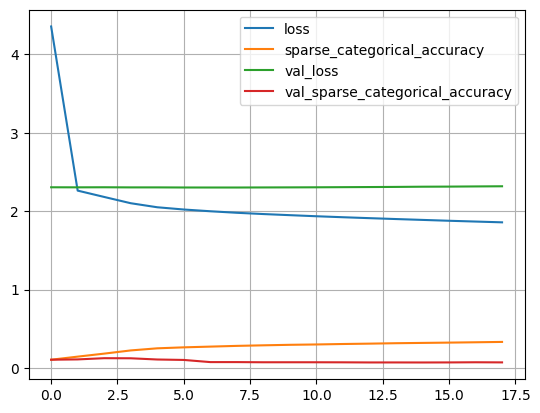

In [54]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)
pl.show()